In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, ToPILImage
import glob
import csv
import cv2
import math
from random import sample
from shutil import copy
from skimage.metrics import structural_similarity as skssim
from skimage.metrics import peak_signal_noise_ratio as skpsnr
from grad import sobel_demo, is_image_file, get_imgdir_grad, get_sorted_grad_list
from gradient import Get_gradient_nopadding,Get_lap_gradient_nopadding
import torch

In [ ]:
dataset = r"E:\Code\Python\datas\SR\benchmark\Urban100\HR"
out_path = "Urban100-sobel"
csv_path = os.path.join(out_path, "Urban100-sobel.csv")
# os.mkdir(out_path)


In [ ]:
get_imgdir_grad(dataset, csv_path, out_path)


In [25]:
sorted_grads = get_sorted_grad_list("AIDtrain.csv")


In [28]:
low_grads = sorted_grads[:3000]
mid_grads = sorted_grads[2500:5500]
high_grads = sorted_grads[5000:]


In [32]:
with open("AID-cross-low.csv", "w", newline='') as f:
    f_csv = csv.writer(f)
    for i in low_grads:
        f_csv.writerow([i[0], i[1]])


In [33]:
with open("AID-cross-mid.csv", "w", newline='') as f:
    f_csv = csv.writer(f)
    for i in mid_grads:
        f_csv.writerow([i[0], i[1]])


In [34]:
with open("AID-cross-high.csv", "w", newline='') as f:
    f_csv = csv.writer(f)
    for i in high_grads:
        f_csv.writerow([i[0], i[1]])


In [ ]:
sorted_test_grads = get_sorted_grad_list("AIDtest.csv")


In [ ]:
with open("AID-cross-low.csv", "w", newline='') as f:
    f_csv = csv.writer(f)
    for i in low_grads:
        f_csv.writerow([i[0], i[1]])


In [ ]:
csv_path = "AID.csv"
grads = []
with open(csv_path, "r") as f:
    f_csv = csv.reader(f)
    for k, v in f_csv:
        grads.append((k, float(v)))


In [ ]:
test_grads = sample(grads, 2000)


In [ ]:
train_set = list(set(grads)-set(test_grads))


In [ ]:
with open("AIDtest.csv", "w", newline='') as f:
    f_csv = csv.writer(f)
    for i in test_grads:
        f_csv.writerow([i[0], i[1]])


In [ ]:
with open("AIDtrain.csv", "w", newline='') as f:
    f_csv = csv.writer(f)
    for i in train_set:
        f_csv.writerow([i[0], i[1]])


In [6]:
def read_csv(csv_path):
    grads = []
    with open(csv_path, "r") as f:
        f_csv = csv.reader(f)
        for k, v in f_csv:
            grads.append(float(v))
    return grads


In [39]:
out_path = "-AID-cross-train"

In [40]:
low_grad_dir = "low"+out_path
if not os.path.exists(low_grad_dir):
    os.mkdir(low_grad_dir)

mid_grad_dir = "mid"+out_path
if not os.path.exists(mid_grad_dir):
    os.mkdir(mid_grad_dir)

high_grad_dir = "high"+out_path
if not os.path.exists(high_grad_dir):
    os.mkdir(high_grad_dir) 

In [46]:
csv_path = "AIDtest.csv"
save_path = "AID-test"
if not os.path.exists(save_path):
    os.mkdir(save_path) 
src_dir = r"E:\Code\Python\datas\selfAID\AID"
with open(csv_path, "r") as f:
    f_csv = csv.reader(f)
    for k,v in f_csv:
        src = os.path.join(src_dir,k)
        dst = os.path.join(save_path,k)  
        copy(src,dst)

In [7]:
csv_path = "AID-grad.csv"
grads = read_csv(csv_path)


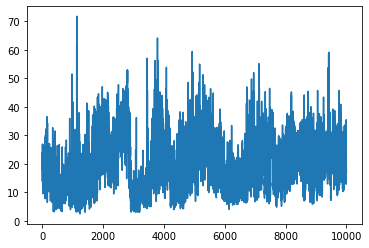

In [8]:
plt.plot(grads)


(array([  7.,  25.,  62.,  87., 120., 139., 167., 153., 198., 224., 234.,
        234., 260., 240., 260., 287., 265., 315., 312., 289., 327., 306.,
        303., 289., 286., 265., 267., 258., 251., 255., 225., 232., 210.,
        227., 184., 182., 165., 162., 144., 163., 144., 137., 123., 126.,
        108., 107., 100.,  72.,  75.,  56.,  42.,  51.,  39.,  39.,  33.,
         27.,  19.,  19.,  12.,  10.,  15.,   9.,   8.,   9.,   5.,   3.,
          3.,   1.,   1.,   0.,   4.,   2.,   3.,   1.,   2.,   3.,   2.,
          2.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 2.47036738,  3.16346928,  3.85657118,  4.54967308,  5.24277498,
         5.93587688,  6.62897878,  7.32208069,  8.01518259,  8.70828449,
         9.40138639, 10.09448829, 10.78759019, 11.48069209, 12.17379399,
        12.86689589, 13.5599978 , 14.2530997 , 14.9462016 , 15.6393035 ,
        16.3324054 , 17.02

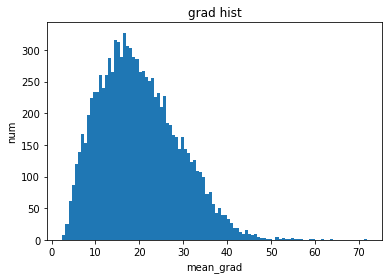

In [9]:
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(grads, 100)


In [10]:
rangrads = sample(grads, 2000)

(array([ 7.,  8., 16., 10., 32., 30., 35., 36., 38., 46., 46., 44., 53.,
        44., 61., 55., 56., 72., 55., 69., 65., 73., 52., 60., 52., 63.,
        52., 45., 49., 45., 57., 38., 40., 31., 29., 33., 34., 34., 37.,
        34., 28., 33., 26., 14., 20., 20., 14.,  8., 11., 10., 17., 10.,
         7.,  7.,  6.,  4.,  4.,  2.,  4.,  4.,  2.,  0.,  2.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.15684116,  3.84307832,  4.52931548,  5.21555264,  5.90178981,
         6.58802697,  7.27426413,  7.9605013 ,  8.64673846,  9.33297562,
        10.01921279, 10.70544995, 11.39168711, 12.07792428, 12.76416144,
        13.4503986 , 14.13663577, 14.82287293, 15.50911009, 16.19534726,
        16.88158442, 17.56782158, 18.25405875, 18.94029591, 19.62653307,
        20.31277024, 20.9990074 , 21.68524456, 22.37148173, 23.057718

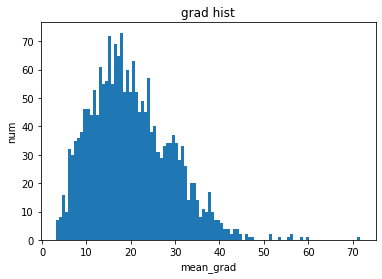

In [12]:
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(rangrads, 100)

(array([ 1.,  4.,  7.,  8.,  9., 20., 19., 17., 37., 33., 30., 31., 37.,
        30., 48., 48., 46., 46., 39., 58., 43., 42., 49., 38., 53., 52.,
        54., 45., 35., 33., 45., 37., 46., 45., 36., 41., 40., 40., 38.,
        35., 34., 33., 37., 34., 19., 37., 15., 24., 21., 17., 25., 27.,
        14., 25., 17., 24., 16., 22., 13., 15., 13.,  8.,  7., 12.,  7.,
        11.,  4.,  4.,  5.,  4.,  3.,  6.,  3.,  4.,  1.,  3.,  2.,  0.,
         2.,  3.,  0.,  3.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.]),
 array([ 2.47036738,  3.01194367,  3.55351996,  4.09509625,  4.63667255,
         5.17824884,  5.71982513,  6.26140142,  6.80297771,  7.34455401,
         7.8861303 ,  8.42770659,  8.96928288,  9.51085917, 10.05243546,
        10.59401176, 11.13558805, 11.67716434, 12.21874063, 12.76031692,
        13.30189322, 13.84346951, 14.3850458 , 14.92662209, 15.46819838,
        16.00977467, 16.55135097, 17.09292726, 17.63450355, 18.176079

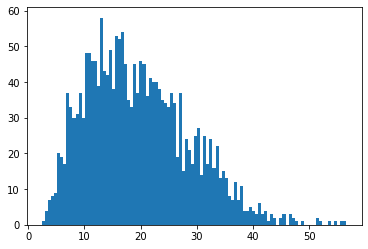

In [13]:
rangrads = sample(grads, 2000)
plt.hist(rangrads, 100)


In [14]:
import scipy.stats
scipy.stats.normaltest(grads)


NormaltestResult(statistic=494.17718085738267, pvalue=4.906690169818109e-108)

In [15]:
np.mean(grads), np.std(grads)


(19.905979728250298, 9.002246670341947)

In [25]:
thres1 = np.ones_like(grads)*15
thres2 = np.ones_like(grads)*25


In [23]:
np.sum(grads < thres1)


3306

In [26]:
np.sum(grads > thres2)


2751

In [ ]:
csv_path = "sobeltrain.csv"
grads = read_csv(csv_path)
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(grads, 100)


In [ ]:
csv_path = "smooth_whurs_train.csv"
grads = read_csv(csv_path)
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(grads, 100, color="slateblue")


In [ ]:
csv_path = "sobeltest.csv"
grads = read_csv(csv_path)
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(grads, 100)


In [ ]:
csv_path = "smooth_whurs_test.csv"
grads = read_csv(csv_path)
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(grads, 100, color="slateblue")


In [3]:
def imgdir_grad(dataset, csv_path , save_path):
    """
    获得一个目录下图片的sobel梯度图和平均梯度
    """
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    with open(csv_path, mode='w', newline='') as f:
        writer = csv.writer(f)
        for imgname in os.listdir(dataset): 
            if  is_image_file(imgname):
                imgpath = os.path.join(dataset,imgname)   
                img = Image.open(imgpath)
                timg = ToTensor()(img).unsqueeze(0).cuda()
                # g = Get_gradient_nopadding()(timg)
                g = Get_lap_gradient_nopadding()(timg)
                gimg = ToPILImage()(g.cpu().squeeze())             
                mgrad = torch.mean(g).item()*255
                gimg.save(os.path.join(save_path,imgname))                                  
                print(imgname,mgrad)
                writer.writerow([imgname,mgrad]) 

In [4]:
imgdir_grad("E:\Code\Python\datas\selfAID\AID","AID-grad-lap.csv","AID-grad-lap")

airport_1.jpg 3.0953029822558165
airport_10.jpg 3.423234410583973
airport_100.jpg 2.106822361238301
airport_101.jpg 2.388200112618506
airport_102.jpg 2.418992235325277
airport_103.jpg 1.754683619365096
airport_104.jpg 2.383493590168655
airport_105.jpg 1.886713590938598
airport_106.jpg 2.3003253154456615
airport_107.jpg 1.9706615363247693
airport_108.jpg 1.884272221941501
airport_109.jpg 1.914051698986441
airport_11.jpg 2.907566693611443
airport_110.jpg 1.823648374993354
airport_111.jpg 2.156726745888591
airport_112.jpg 2.389330076985061
airport_113.jpg 2.2523794881999493
airport_114.jpg 2.0406498620286584
airport_115.jpg 2.3197569977492094
airport_116.jpg 2.481148112565279
airport_117.jpg 2.3895167419686913
airport_118.jpg 2.5165700493380427
airport_119.jpg 2.3188136983662844
airport_12.jpg 2.0830657985061407
airport_120.jpg 2.233010265044868
airport_121.jpg 1.2878138339146972
airport_122.jpg 1.2930094613693655
airport_123.jpg 1.6744428500533104
airport_124.jpg 1.8872117204591632
airpo

In [27]:
from torch import nn

In [33]:
nn.Transformer?

Init signature:
nn.Transformer(
    d_model: int = 512,
    nhead: int = 8,
    num_encoder_layers: int = 6,
    num_decoder_layers: int = 6,
    dim_feedforward: int = 2048,
    dropout: float = 0.1,
    activation: str = 'relu',
    custom_encoder: Union[Any, NoneType] = None,
    custom_decoder: Union[Any, NoneType] = None,
) -> None
Docstring:     
A transformer model. User is able to modify the attributes as needed. The architecture
is based on the paper "Attention Is All You Need". Ashish Vaswani, Noam Shazeer,
Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Lukasz Kaiser, and
Illia Polosukhin. 2017. Attention is all you need. In Advances in Neural Information
Processing Systems, pages 6000-6010. Users can build the BERT(https://arxiv.org/abs/1810.04805)
model with corresponding parameters.

Args:
    d_model: the number of expected features in the encoder/decoder inputs (default=512).
    nhead: the number of heads in the multiheadattention models (default=8).
    num_

In [29]:
model = nn.Transformer()

In [32]:
model

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): 